# Домашнее задание по теме: выбросы (outliers)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn scipy -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import scipy
from scipy import stats

scipy.__version__

'1.6.1'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [8]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/hotel_bookings.csv")

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Графическое представление выбросов

1. С помощью `boxplot` (пакет `seaborn`) показать, где имеются выбросы. Можно реализовать это любым удобным способом.

1. Сделать выводы по этим изображениям: 
    - Есть ли выбросы?
    - Если есть, то в каких колонках?

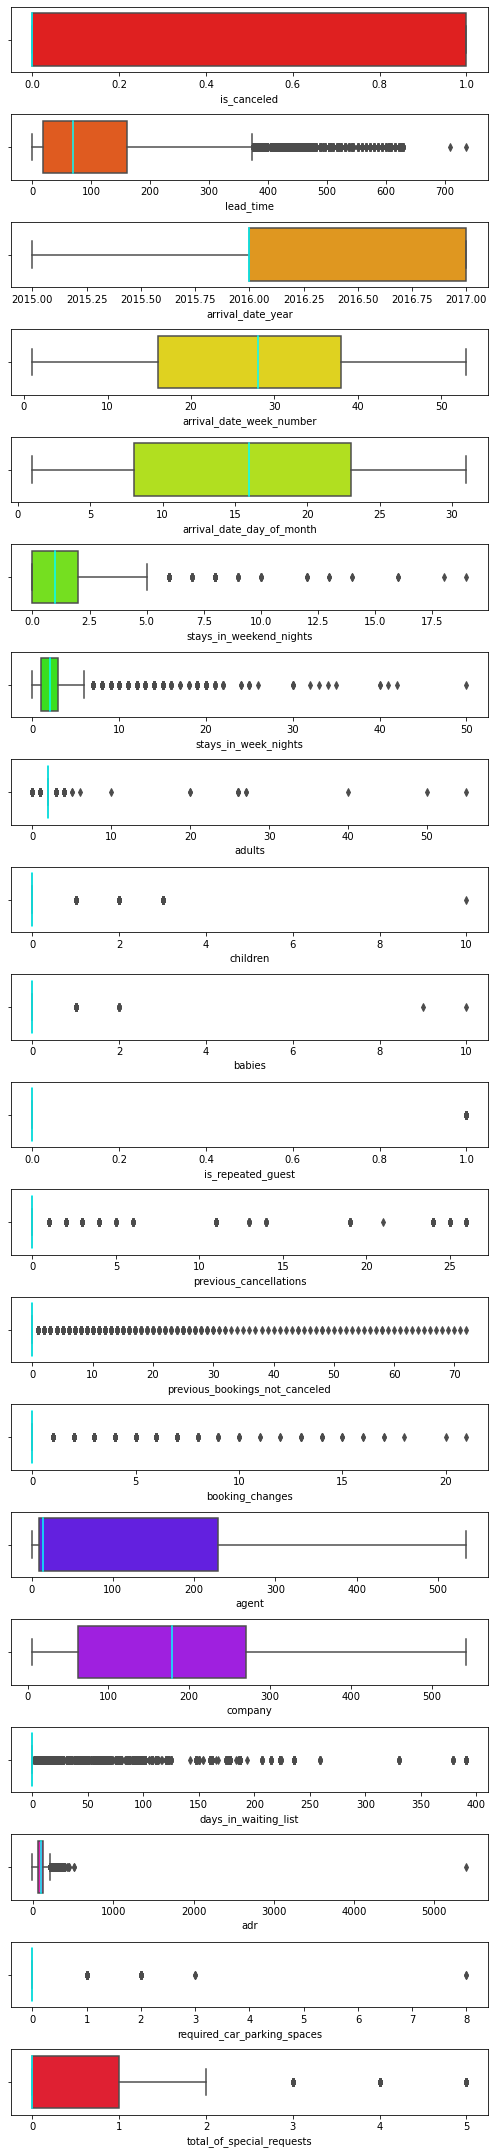

In [9]:
df_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols_len = len(df_numeric_cols)


fig, axs = plt.subplots(numeric_cols_len, 1, 
                        figsize=(7, numeric_cols_len*1.5))

cmap = plt.get_cmap('hsv', numeric_cols_len)

for index, column_name in enumerate(df_numeric_cols):
    c = cmap(index)
    
    sns.boxplot(x=df[column_name], ax=axs[index], color=c)
    axs[index].get_lines()[4].set_color('cyan')
    
    
fig.tight_layout(pad=1.0)

## Обнаружение и удаление выбросов

### Способ основанный на межквартильном расстоянии (Interquartile range = IQR, Tukey's fences)

1. Выбрать одну или несколько колонок содержащих выбросы.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено.

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

In [10]:
df.adults.describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [11]:
Q1 = df.adults.quantile(0.25)
Q3 = df.adults.quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlower_fence = {lower_fence}\nupper_fence = {upper_fence}")

Q1 = 2.0
Q3 = 2.0
IQR = 0.0
lower_fence = 2.0
upper_fence = 2.0


In [12]:
adults_iqr = df.adults[~((df.adults < lower_fence) |
                         (df.adults > upper_fence))]
adults_iqr

0         2
1         2
4         2
5         2
6         2
         ..
119384    2
119385    2
119387    2
119388    2
119389    2
Name: adults, Length: 89680, dtype: int64

In [13]:
len(df.adults) - len(adults_iqr)

29710

<AxesSubplot:>

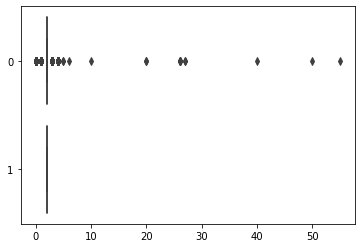

In [14]:
sns.boxplot(data=[df.adults, 
                  adults_iqr], 
            orient='h')

### Способ основанный на Z-оценке (z-score)

1. Выбрать одну или несколько колонок содержащих выбросы. Можно использовать те, что были в IQR-способе.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено. Это больше или меньше, чем способом IQR?

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

In [15]:
from scipy import stats

z_abs = np.abs(stats.zscore(df.adults))
z_abs

array([0.24789727, 0.24789727, 1.47844749, ..., 0.24789727, 0.24789727,
       0.24789727])

In [16]:
adults_z = df.adults[z_abs < 3]
adults_z

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 118909, dtype: int64

In [17]:
len(df.adults) - len(adults_z)

481

<AxesSubplot:>

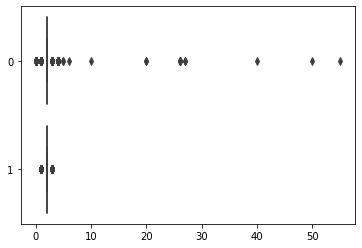

In [18]:
sns.boxplot(data=[df.adults, 
                  adults_z], 
            orient='h')